# Analysis of RH 1.5D code

----------

First we want to look at the atmospheric data to locate various features. Note that we are looking at a coronal hole generated from the Bifrost code (currently snapshot 800 (image 41)). 

In [2]:
#%matplotlib ipympl
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

file_path = "../../../Atmos/bifrost_ch012012_hion_snap800.hdf5"
file = h5py.File(file_path, "r")

In [3]:
file.keys()

<KeysViewHDF5 ['B_x', 'B_y', 'B_z', 'depth', 'electron_density', 'hydrogen_populations', 'nhydr', 'snapshot_number', 'temperature', 'velocity_z', 'x', 'y', 'z']>

In [4]:
file["z"]

<HDF5 dataset "z": shape (1, 1024), type "<f8">

Find the index of the z value closest to zero.

In [4]:
z0 = np.argmin(abs(file["z"][0]))
print("Index:    %i" % z0)
print("z value:  %i m" % file["z"][0][z0])

Index:    762
z value:  -2288 m


In [5]:
import cv2
import os

def make_video(image_folder, video_name, FPS=15):
    images = np.sort([img for img in os.listdir(image_folder) if img.endswith(".png")])
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape
    
    video = cv2.VideoWriter("videos/"+video_name, 0, FPS, (width,height))
    
    for image in images:
        #print("Adding file to video:    ", os.path.join(image_folder, image))
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()
    

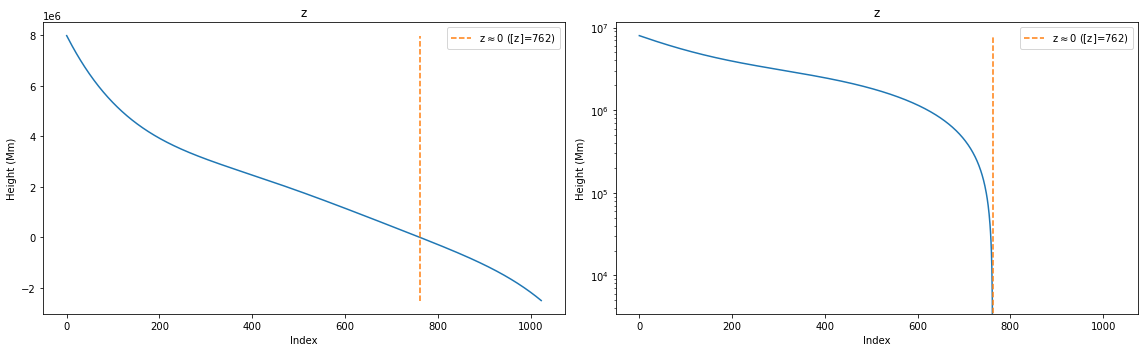

In [6]:
snap = file["snapshot_number"][0]
steps = np.linspace(0, len(file["z"][0])-1, len(file["z"][0])).astype("int")
#z_num = np.linspace(0, len(steps), int(len(steps)/10)).astype("int")
#if z_num[-1] == len(file["z"][0]):
#    z_num[-1] = z_num[-1] - 1


plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title("z")
plt.plot(steps, file["z"][0])
plt.plot([z0, z0], [min(file["z"][0]),max(file["z"][0])], "--", label=r"z$\approx$0 ([z]=%i)" % z0)
plt.legend()
plt.xlabel("Index"); plt.ylabel("Height (Mm)")


plt.subplot(122)
plt.title("z")
plt.plot(steps, file["z"][0])
plt.plot([z0, z0], [min(file["z"][0]),max(file["z"][0])], "--", label=r"z$\approx$0 ([z]=%i)" % z0)
plt.legend()
plt.yscale("log")
plt.xlabel("Index"); plt.ylabel("Height (Mm)")

plt.tight_layout()


In [7]:
column1 = (757,380)
column2 = (195,787)
column_col1 = "red"
column_col2 = "blue"

# rh will run with a descent amount of columns within this box
dx1 = 10
dy1 = 40
square1 = [[column1[0]-dx1, column1[0]+dx1, column1[0]+dx1, column1[0]-dx1, column1[0]-dx1],
          [column1[1]-dy1, column1[1]-dy1, column1[1]+dy1, column1[1]+dy1, column1[1]-dy1]]
print("x and y around first column:")
print("X_START: %i   X_END: %i   Y_START: %i   Y_END: %i" % (square1[0][0], square1[0][1], square1[1][0], square1[1][2]))


# rh will run with a descent amount of columns within this box
dx2 = 30
dy2 = 10
square2 = [[column2[0]-dx2, column2[0]+dx2, column2[0]+dx2, column2[0]-dx2, column2[0]-dx2],
          [column2[1]-dy2, column2[1]-dy2, column2[1]+dy2, column2[1]+dy2, column2[1]-dy2]]
print("\nx and y around second column:")
print("X_START: %i   X_END: %i   Y_START: %i   Y_END: %i" % (square2[0][0], square2[0][1], square2[1][0], square2[1][2]))


x and y around first column:
X_START: 747   X_END: 767   Y_START: 340   Y_END: 420

x and y around second column:
X_START: 165   X_END: 225   Y_START: 777   Y_END: 797


Mean magnetic field in vertical direction at z=0:   -0.254 mT 



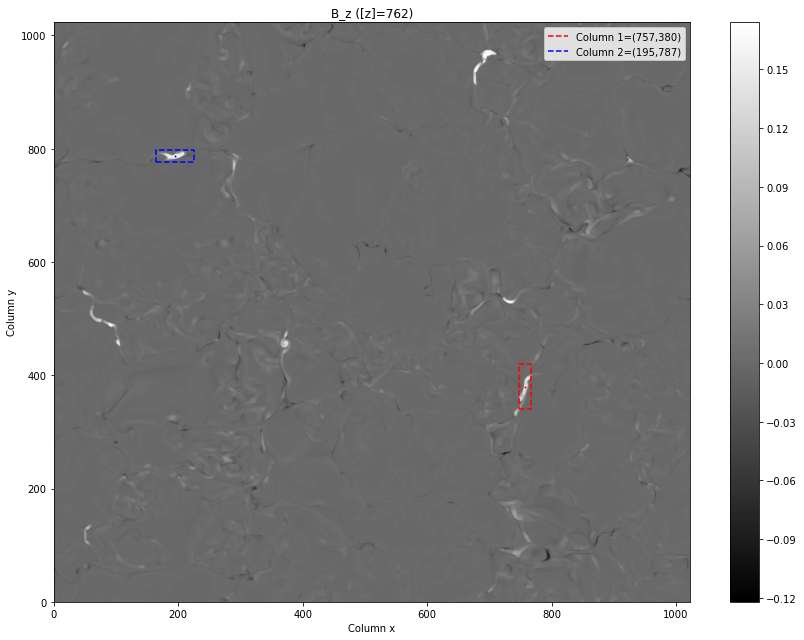

In [8]:
plt.close()
plt.figure(figsize=(12,9))
contour_levels = 150

plt.title("B_z ([z]=%i)" % z0)
plt.contourf(file["B_z"][0,:,:,z0], cmap="gray", levels=contour_levels)
plt.plot(column1[0], column1[1], ".", color=column_col1, ms=2)
plt.plot(column2[0], column2[1], ".", color=column_col2, ms=2)
plt.plot(square1[0], square1[1], "--", color=column_col1, label="Column 1=(%i,%i)" % (column1[0], column1[1]))
plt.plot(square2[0], square2[1], "--", color=column_col2, label="Column 2=(%i,%i)" % (column2[0], column2[1]))
#circle1 = plt.Circle(column1, 50, color=column_col1, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (column1[0], column1[1]))
#circle2 = plt.Circle(column2, 50, color=column_col2, fill=False, clip_on=False, label="Column 2=(%i,%i)" % (column2[0], column2[1]))
#plt.gca().add_patch(circle1)
#plt.gca().add_patch(circle2)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()




plt.tight_layout()
#plt.savefig("images/B/snapshot%i_zidx%.4i.png" % (snap, z0))
#plt.close()

mean_Bz0 = np.mean(file["B_z"][0,:,:,z0])
print("Mean magnetic field in vertical direction at z=0:   %.3f mT \n" % (1e3*mean_Bz0))   # +- 0.1 Tesla (+- 1000 Gauss)    prøv 

In [7]:
column3 = (205,767)
column4 = (300,810)
column_col3 = "yellow"
column_col4 = "green"

# rh will run with a descent amount of columns within this box
dx3 = 120
dy3 = 120
square3 = [[column3[0]-dx3, column3[0]+dx3, column3[0]+dx3, column3[0]-dx3, column3[0]-dx3],
          [column3[1]-dy3, column3[1]-dy3, column3[1]+dy3, column3[1]+dy3, column3[1]-dy3]]
print("x and y around third column:")
print("X_START: %i   X_END: %i   Y_START: %i   Y_END: %i" % (square3[0][0], square3[0][1], square3[1][0], square3[1][2]))

x and y around third column:
X_START: 85   X_END: 325   Y_START: 647   Y_END: 887


Approximate height of rotational behavior:   1.833 Mm 



NameError: name 'contour_levels' is not defined

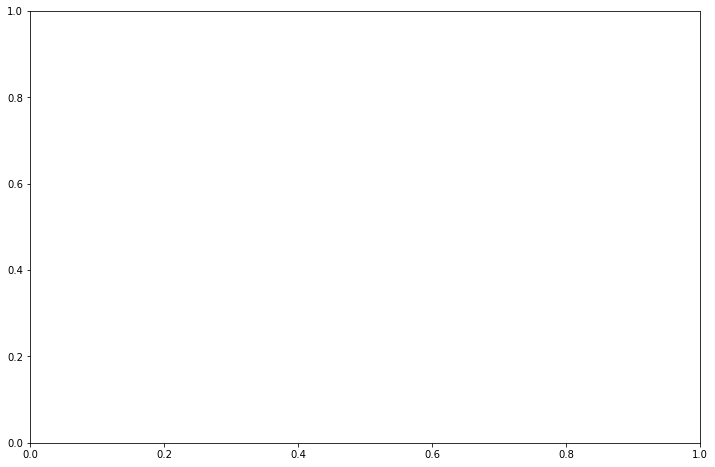

In [5]:
plt.close()
plt.figure(figsize=(12,27))


z500 = 500    # index with rotational behavior
height500 = file["z"][0][z500]
print("Approximate height of rotational behavior:   %.3f Mm \n" % (1e-6*height500))

plt.subplot(311)
plt.contourf(file["electron_density"][0,:,:,z500], cmap="gray", levels=contour_levels)
plt.plot(column3[0], column3[1], ".", color=column_col3, ms=2)
plt.plot(square3[0], square3[1], "--", color=column_col3, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
plt.title("electron_density ([z]=%i)" % z500)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
#plt.plot(column3[0], column3[1], ".", color=column_col3, ms=2)
#plt.plot(column4[0], column4[1], ".", color=column_col4, ms=2)
#circle3 = plt.Circle(column3, 50, color=column_col3, fill=False, clip_on=False, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
#circle4 = plt.Circle(column4, 50, color=column_col4, fill=False, clip_on=False, label="Column 4=(%i,%i)" % (column4[0], column4[1]))
#plt.gca().add_patch(circle3)
#plt.gca().add_patch(circle4)
plt.legend()


plt.subplot(312)
plt.contourf(file["temperature"][0,:,:,z500], cmap="gray", levels=contour_levels)
plt.plot(column3[0], column3[1], ".", color=column_col3, ms=2)
plt.plot(square3[0], square3[1], "--", color=column_col3, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
plt.title("temperature ([z]=%i)" % z500)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
#plt.plot(column3[0], column3[1], ".", color=column_col3, ms=2)
#plt.plot(column4[0], circolumn4c4[1], ".", color=column_col4, ms=2)
#circle3 = plt.Circle(column3, 50, color=column_col3, fill=False, clip_on=False, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
#circle4 = plt.Circle(column4, 50, color=column_col4, fill=False, clip_on=False, label="Column 4=(%i,%i)" % (column4[0], column4[1]))
#plt.gca().add_patch(circle3)
#plt.gca().add_patch(circle4)
plt.legend()


plt.subplot(313)
plt.contourf(file["velocity_z"][0,:,:,z500], cmap="gray", levels=contour_levels)
plt.plot(column3[0], column3[1], ".", color=column_col3, ms=2)
plt.plot(square3[0], square3[1], "--", color=column_col3, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
plt.title("velocity_z ([z]=%i)" % z500)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
#plt.plot(column3[0], column3[1], ".", color=column_col3, ms=2)
#plt.plot(column4[0], column4[1], ".", color=column_col4, ms=2)
#circle3 = plt.Circle(column3, 50, color=column_col3, fill=False, clip_on=False, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
#circle4 = plt.Circle(column4, 50, color=column_col4, fill=False, clip_on=False, label="Column 4=(%i,%i)" % (column4[0], column4[1]))
#plt.gca().add_patch(circle3)
#plt.gca().add_patch(circle4)
plt.legend()


plt.tight_layout()
#plt.savefig("images/edens_temp_velz/snapshot%i_zidx%.4i.png" % (snap, z500))
#plt.close()

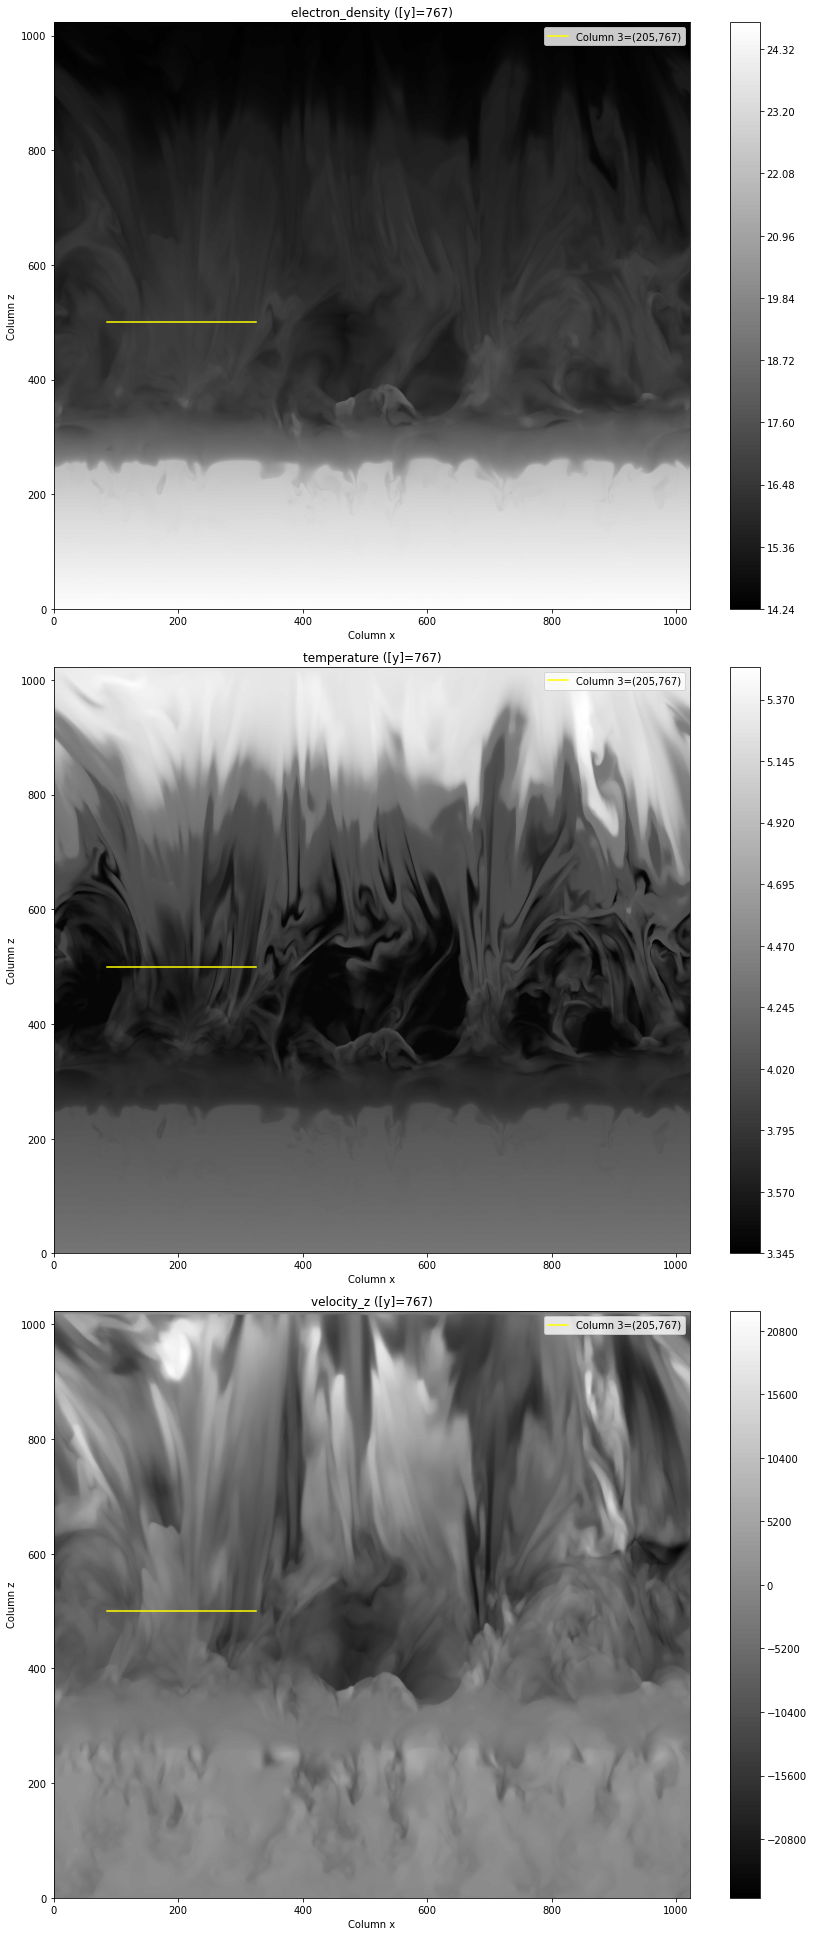

In [8]:
plt.close()
plt.figure(figsize=(12,27))

y500 = 767
contour_levels = 150

plt.subplot(311)
plt.contourf(np.log10(np.flip(file["electron_density"][0,:,y500,:], axis=1)).T, cmap="gray", levels=contour_levels)
plt.title("electron_density ([y]=%i)" % y500)
plt.xlabel("Column x"); plt.ylabel("Column z")
plt.plot([column3[0]-dx3,column3[0]+dx3], [z500,z500], color=column_col3, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
plt.colorbar()
plt.legend()


plt.subplot(312)
plt.contourf(np.log10(np.flip(file["temperature"][0,:,y500,:], axis=1)).T, cmap="gray", levels=contour_levels)
plt.title("temperature ([y]=%i)" % y500)
plt.xlabel("Column x"); plt.ylabel("Column z")
plt.plot([column3[0]-dx3,column3[0]+dx3], [z500,z500], color=column_col3, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
plt.colorbar()
plt.legend()


plt.subplot(313)
plt.contourf(np.flip(file["velocity_z"][0,:,y500,:], axis=1).T, cmap="gray", levels=contour_levels)
plt.title("velocity_z ([y]=%i)" % y500)
plt.xlabel("Column x"); plt.ylabel("Column z")
plt.plot([column3[0]-dx3,column3[0]+dx3], [z500,z500], color=column_col3, label="Column 3=(%i,%i)" % (column3[0], column3[1]))
plt.colorbar()
plt.legend()


plt.tight_layout()
#plt.savefig("images/edens_temp_velz/snapshot%i_zidx%.4i.png" % (snap, z500))
#plt.close()

KeyboardInterrupt: 

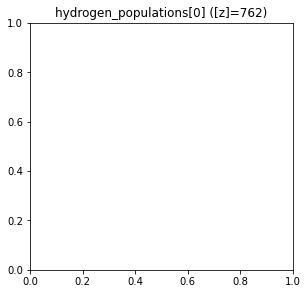

In [16]:
plt.close()
plt.figure(figsize=(16,10))


plt.subplot(231)
plt.title("hydrogen_populations[0] ([z]=%i)" % z0)
plt.contourf(file["hydrogen_populations"][0,0,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(232)
plt.title("hydrogen_populations[1] ([z]=%i)" % z0)
plt.contourf(file["hydrogen_populations"][0,1,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(233)
plt.title("hydrogen_populations[2] ([z]=%i)" % z0)
plt.contourf(file["hydrogen_populations"][0,2,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(234)
plt.title("hydrogen_populations[3] ([z]=%i)" % z0)
plt.contourf(file["hydrogen_populations"][0,3,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(235)
plt.title("hydrogen_populations[4] ([z]=%i)" % z0)
plt.contourf(file["hydrogen_populations"][0,4,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(236)
plt.title("hydrogen_populations[5] ([z]=%i)" % z0)
plt.contourf(file["hydrogen_populations"][0,5,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.tight_layout()
#plt.savefig("images/H_pop/snapshot%i_zidx%.4i.png" % (snap, z0))
#plt.close()

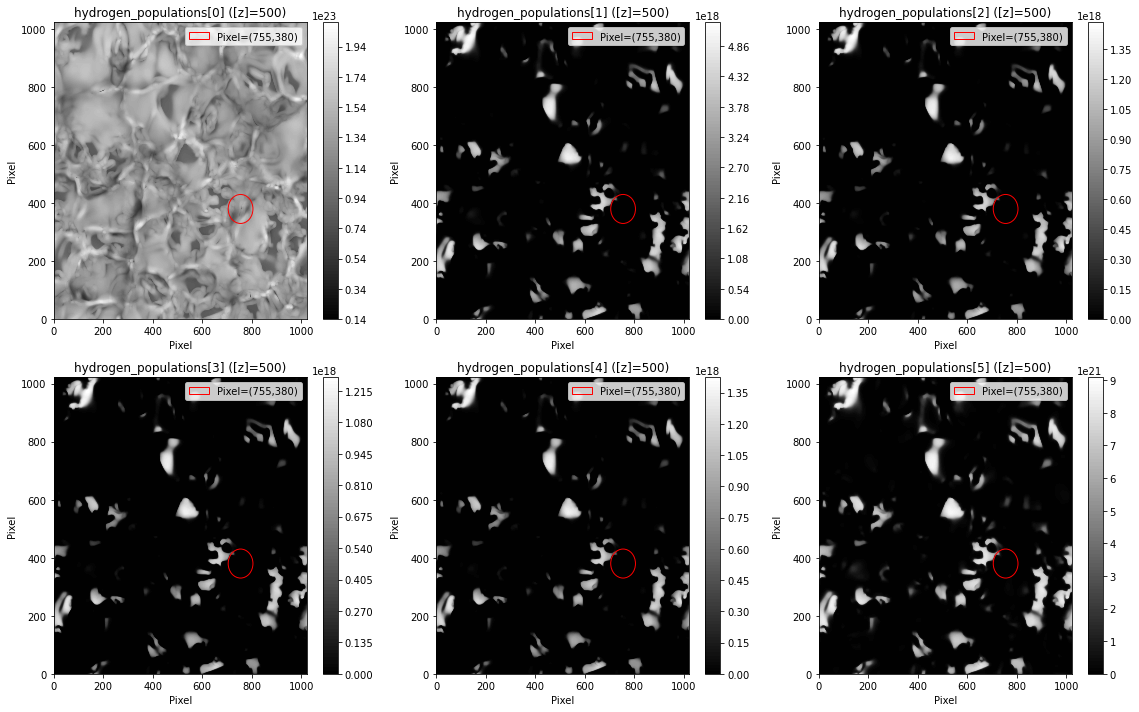

In [111]:
plt.close()
plt.figure(figsize=(16,10))


plt.subplot(231)
plt.title("hydrogen_populations[0] ([z]=%i)" % z500)
plt.contourf(file["hydrogen_populations"][0,0,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(232)
plt.title("hydrogen_populations[1] ([z]=%i)" % z500)
plt.contourf(file["hydrogen_populations"][0,1,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(233)
plt.title("hydrogen_populations[2] ([z]=%i)" % z500)
plt.contourf(file["hydrogen_populations"][0,2,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(234)
plt.title("hydrogen_populations[3] ([z]=%i)" % z500)
plt.contourf(file["hydrogen_populations"][0,3,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(235)
plt.title("hydrogen_populations[4] ([z]=%i)" % z500)
plt.contourf(file["hydrogen_populations"][0,4,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.subplot(236)
plt.title("hydrogen_populations[5] ([z]=%i)" % z500)
plt.contourf(file["hydrogen_populations"][0,5,:,:,z0], cmap="gray", levels=100)
circle1 = plt.Circle(circ, 50, color=circ_col, fill=False, clip_on=False, label="Column 1=(%i,%i)" % (circ[0], circ[1]))
plt.gca().add_patch(circle1)
plt.xlabel("Column x"); plt.ylabel("Column y")
plt.colorbar()
plt.legend()


plt.tight_layout()
#plt.savefig("images/H_pop/snapshot%i_zidx%.4i.png" % (snap, z0))
#plt.close()